# Matrix
(Graph Theory)

## Description
Given a simple acyclic graph with $N$ nodes and $N-1$ positively weighted edges (which is a tree) and $K$ nodes that are "critical". Find the subset of edges with the smallest sum of weights so that, when cutted, the critical nodes are disconnected from each other. 

**Note**： the original description of the problem seems to indicate the the graph is a tree, but doesn't say it explicitly. The solution would work if the graph is disconnected, however it does assume the graph is acyclic. Since it is also sure that the graph has $N-1$ edges, given that my solution passes, we can safely assume that the problem means the graph to be a tree. 

## Solution (Greedy)
Take an arbitrary critical node $A$ and search for another critical node from $A$ (here I use depth-first search). If no such a node exists, then $A$ is already separated from all other critical nodes. Let $B$ be the **first** critical node found from $A$, cut the edge with the lowest weight on the **unique** path between $A$ and $B$. Continue until all critical nodes are disconnected from each other.  

## Proof of correctness
Let $A$ be a critical node and $B$ be the first critical node found from $A$. 



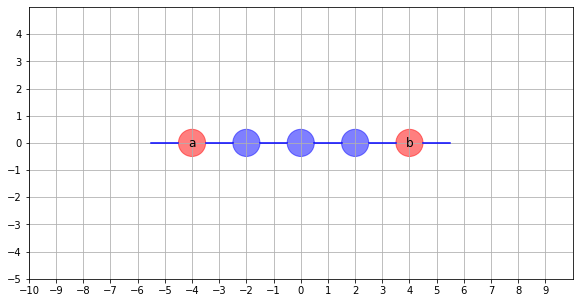

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


fig, ax = plt.subplots(figsize=(10, 5)) 
ax.set_aspect(1)
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-5, 5, 1))
alpha = .5
radius = .5

node_a = plt.Circle((-4, 0), radius, color='r', alpha=alpha)
node_b = plt.Circle((4, 0), radius, color='r', alpha=alpha)
ax.grid()
ax.add_patch(node_a)
ax.add_patch(node_b)
label_a = ax.annotate("a", xy=(-4, 0), fontsize=12, ha="center", va='center')
label_b = ax.annotate("b", xy=(4, 0), fontsize=12, ha="center", va='center')

for i in [-2, 0, 2]:
    node = plt.Circle((i, 0), radius, color='b', alpha=alpha)
    ax.add_patch(node)
for i in np.arange(-5.5, 5, 2):
    plt.plot([i, i + 1], [0, 0], color='b')

In [1]:
import math
import os
import random
import re
import sys

In [ ]:
def dfs(adjList, u, visited, machines):
    for v in adjList[u]:
        if v not in visited:
            if v in machines:
                return (u, v)
            visited.add(v)
            edge = dfs(adjList, v, visited, machines)
            if edge:
                if adjList[u][v] < adjList[edge[0]][edge[1]]:
                    edge = (u, v)
                return edge
    return None
            
    
def minTime(n, roads, machines):
    adjList = {i: {} for i in range(n)}
    for u, v, w in roads:
        adjList[u][v] = w
        adjList[v][u] = w
    
    machines = set(machines)
    s = 0
    for m in machines:
        while True:
            visited = set([m])
            edge = dfs(adjList, m, visited, machines)
            if edge:
                u, v = edge
                s += adjList[u][v]
                del adjList[u][v]
                del adjList[v][u]
            else:
                break
    
    return s
    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    first_multiple_input = input().rstrip().split()

    n = int(first_multiple_input[0])

    k = int(first_multiple_input[1])

    roads = []

    for _ in range(n - 1):
        roads.append(list(map(int, input().rstrip().split())))

    machines = []

    for _ in range(k):
        machines_item = int(input().strip())
        machines.append(machines_item)

    result = minTime(n, roads, machines)

    fptr.write(str(result) + '\n')

    fptr.close()
